In [3]:
import pandas as pd
import numpy as np

# On this page
 
Series

- Series is ndarray-like

- Series is dict-like

- Vectorized operations and label alignment with Series

- Name attribute

DataFrame 

- From dict of Series or dicts
- From dict of ndarrays / lists
- From structured or record array
- From a list of dicts
- From a dict of tuples
- From a Series
- From a list of namedtuples
- From a list of dataclasses
- Alternate constructors
- Column selection, addition, deletion
- Assigning new columns in method chains
- Indexing / selection
- Data alignment and arithmetic
- Transposing
- DataFrame interoperability with NumPy functions
- Console display
- DataFrame column attribute access and IPython completion


# Series 



In [4]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a   -1.353374
b   -1.818208
c    0.832843
d    1.781822
e    0.697982
dtype: float64

In [5]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [7]:
d = {'b':0, 'a':4, 'c':2}
pd.Series(d)

b    0
a    4
c    2
dtype: int64

In [8]:
pd.Series(d, index=list('abcd'))

a    4.0
b    0.0
c    2.0
d    NaN
dtype: float64

In [9]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

## Series is ndarray-like

In [10]:
s[s > s.median()]

c    0.832843
d    1.781822
dtype: float64

In [11]:
s[[1,3,4]]

b   -1.818208
d    1.781822
e    0.697982
dtype: float64

In [12]:
s.dtype

dtype('float64')

In [13]:
s.to_numpy()

array([-1.35337448, -1.81820837,  0.83284333,  1.78182169,  0.69798179])

## Series is dict-like

A Series is also like a fixed-size dict in that you can get and set values by index label:

In [14]:
"e" in s

True

In [16]:
s.get("f") is None

True

In [17]:
s.get("f", np.nan)

nan

## Vectorized operations and label alignment with Series

In [18]:
#what works with numpy array usually works for Series as well
s + s
s*2
np.exp(s)
s[1::]+s[:-1]

a         NaN
b   -3.636417
c    1.665687
d    3.563643
e         NaN
dtype: float64

## Name attribute

In [19]:
s = pd.Series(np.random.randn(5), name="something")


In [23]:
s2 = s.rename("different")
s2.name

'different'

In [24]:
s.name

'something'

# DataFrame

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

Dict of 1D ndarrays, lists, dicts, or Series

2-D numpy.ndarray

Structured or record ndarray

A Series

Another DataFrame

In [26]:
df = pd.DataFrame(s)
df

,something
0,0.590101
1,0.937394
2,1.038503
3,1.036751
4,1.844072


## From dict of Series or dicts

In [27]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

In [30]:
df = pd.DataFrame(d, index=list('acbd'), columns=['two', 'three'])
df

,two,three
a,1.0,NaN
c,3.0,NaN
b,2.0,NaN
d,4.0,NaN


## From dict or ndarray list

In [31]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}


In [34]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


## From structured or record array

In [36]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])

data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [37]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [43]:
type(data[0][2])

numpy.bytes_

## From list of dicts

In [45]:
data = [{'a':2, 'b':4}, {'a': 3, 'b':0, 'c':1}]
data

[{'a': 2, 'b': 4}, {'a': 3, 'b': 0, 'c': 1}]

In [55]:
pd.DataFrame(data, index=['first','second'], columns = list('abcd'))

,a,b,c,d
first,2,4,NaN,NaN
second,3,0,1.0,NaN


## From a dict of tuples

In [62]:
data = {
    ('a','b'): {("A", "B"): 1, ("A", "C"): 2},
    ('a','a'): {("A", "B"): 1, ("A", "C"):2},
    ('a','c'): {("A", "C"): 22, ("A", "C"):12}
}

In [63]:
pd.DataFrame(data)

a         
     b  a     c
A B  1  1   NaN
  C  2  2  12.0

In [64]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)


a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

## From a Series

In [65]:
s = pd.Series(np.arange(3), index=['a', 'b', 'c'], name='test')

In [66]:
s

a    0
b    1
c    2
Name: test, dtype: int64

In [70]:
df = pd.DataFrame(s)
df

,test
a,0
b,1
c,2


## From a list of namedtuple

A named tuple is an extension and custom data type that enrich built-in tuples with extra utilities. They are very useful in context where we need to create a data structure that can be accessed by both the positional index and the named attribute of the elements.

In [72]:
from collections import namedtuple

Point = namedtuple("Point", "x y")
Point

__main__.Point

In [74]:
Point(0,2)

Point(x=0, y=2)

In [75]:
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


## From a list of dataclasses

In [76]:
from dataclasses import make_dataclass

Point = make_dataclass("Point", [("x", int), ("y", int)])

pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


## Alternate constructor

In [80]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [81]:
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient="index",
    columns=["one", "two", "three"],
)

,one,two,three
A,1,2,3
B,4,5,6


## Column selection, addition, deletion

In [82]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}


df = pd.DataFrame(d)

df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [83]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [85]:
df.loc['a']

one    1.0
two    1.0
Name: a, dtype: float64

In [86]:
df["three"] = df["one"] * df["two"]

In [87]:
df['flag'] = df['one'] > 2

In [88]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [90]:
del df['two']

In [91]:
three = df.pop("three")

In [92]:
three

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

In [93]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [94]:
df["foo"] = "bar"

In [95]:
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [97]:
df["one_trunc"] = df["one"][:2]

In [98]:
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [99]:
df.insert(1, "bar", df["one"])

## Assigning new columns in method chains

Inspired by dplyr’s mutate verb, DataFrame has an assign() method that allows you to easily create new columns that are potentially derived from existing columns.

In [111]:
path_iris = '/Users/xavierpivan/Projets/training/data/Iris.csv'
iris = pd.read_csv(path_iris)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [112]:
iris.assign(sepal_ratio=iris["SepalWidthCm"] / iris["SepalLengthCm"]).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [116]:
iris_copy = iris.assign(sepal_ratio=lambda x: (x["SepalWidthCm"] / x["SepalLengthCm"])).head()

assign() always returns a copy of the data, leaving the original DataFrame untouched.

Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using assign() in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

<Axes: xlabel='SepalRatioCm', ylabel='PetalRatioCm'>

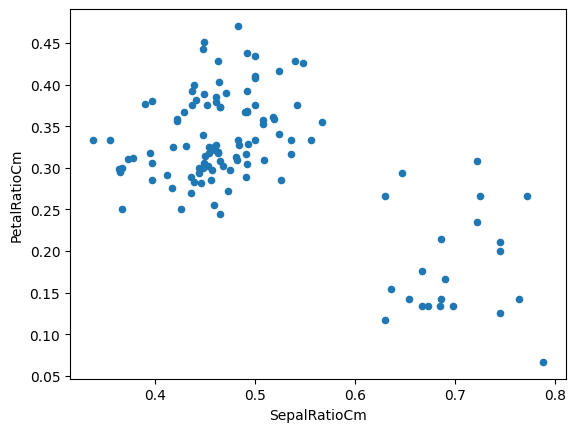

In [119]:
(
    iris.query("SepalLengthCm > 5")
    .assign(
        SepalRatioCm=lambda x: x.SepalWidthCm / x.SepalLengthCm,
        PetalRatioCm=lambda x: x.PetalWidthCm / x.PetalLengthCm,
    )
    .plot(kind="scatter", x="SepalRatioCm", y="PetalRatioCm")
)

## Data alignment and arithmetic

Data alignment between DataFrame objects automatically align on both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.



In [120]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])

df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

In [121]:
df+df2

,A,B,C,D
0,0.470177,0.476946,-1.392266,NaN
1,-0.052641,-0.331633,-0.227490,NaN
2,2.948178,-1.123332,0.262696,NaN
3,-0.307128,1.195265,0.737856,NaN
4,-1.279377,0.185053,-1.429831,NaN
5,-0.512833,1.426823,-1.675586,NaN
6,0.833173,0.794714,1.801787,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [125]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)

df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)

df1

,a,b
0,True,False
1,False,True
2,True,True


In [126]:
df2

,a,b
0,False,True
1,True,True
2,True,False


In [127]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [123]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [124]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [128]:
-df1

,a,b
0,False,True
1,True,False
2,False,False
